# Project - Exploratory Data Analysis of Sales Data Using Python

### Section 1 - Introduction

This project involves the analysis of a sales dataset to uncover customer purchasing behaviors, demographic trends, and product preferences.  
The dataset contains key variables such as:  
- Customer demographics (e.g., Age, Gender, Marital Status, Occupation).  
- Product details (e.g., Product Categories, Orders).  
- Spending information (e.g., Amount spent, Total Orders).  

The primary goal of this analysis is to understand customer segments, identify high-performing products, and provide actionable insights that businesses can use to optimize marketing strategies, improve product offerings, and maximize revenue.  

Through exploratory data analysis (EDA), this study delves into the relationships between customer demographics, purchasing behavior, and revenue generation, providing valuable data-driven insights.  


### Section 2 - Business Problem and Objective

The objective of this analysis is to address the following key business questions:  

- **Customer Segmentation**:  
   Who are the most valuable customers in terms of spending and order frequency?  
   How do customer demographics (e.g., Age, Gender, Marital Status) influence purchasing behavior?  

- **Product Insights**:  
   Which product categories dominate in orders and revenue?  
   Are there underperforming categories that need attention?  

- **Spending Patterns**:  
   How does spending vary by age group, gender, and occupation?  
   What are the trends in spending behavior across regions or demographics?  

- **Actionable Opportunities**:  
   Which groups require targeted marketing campaigns to increase spending?  
   How can businesses use these insights to maximize customer engagement and drive growth?  


### Section 3 - Exploratory Data Analysis

**Section 3.1 - Data Cleaning and Transformation**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Sales_Data.csv', encoding= 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#check for null values
pd.isnull(df).sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [8]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
#Again check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# drop null values
df.dropna(inplace=True)

In [11]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtypes

dtype('int64')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


**Section 3.2 - Data Analysis and Visualization**

**Question 1: What is the distribution of the Age of customers in the dataset?**

In [43]:
age_summary = df['Age'].describe()
print(age_summary)

count    11239.000000
mean        35.410357
std         12.753866
min         12.000000
25%         27.000000
50%         33.000000
75%         43.000000
max         92.000000
Name: Age, dtype: float64


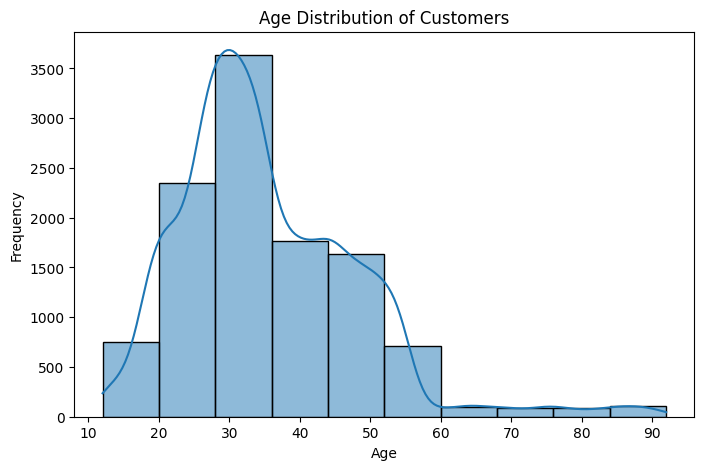

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Question 2: What is the gender distribution of customers?**

In [18]:
# Count of each Gender
df['Gender'].value_counts()

Gender
F    7832
M    3407
Name: count, dtype: int64

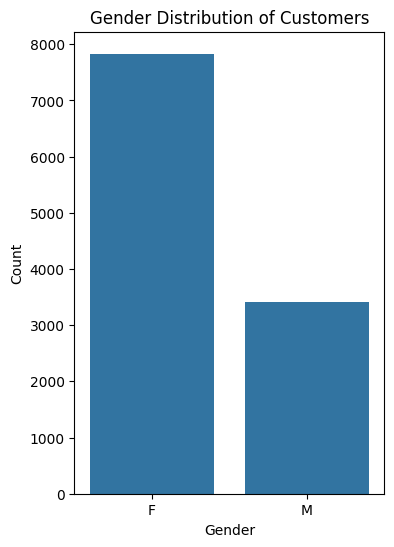

In [46]:
plt.figure(figsize=(4, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


*Findings : Almost 70% of the customers are Female.*

**Question 3: What is the marital status distribution of customers?**

In [20]:
df['Marital_Status'].value_counts()

Marital_Status
0    6518
1    4721
Name: count, dtype: int64

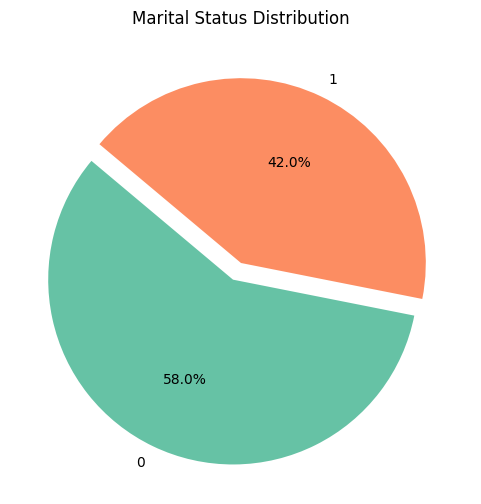

In [21]:
plt.figure(figsize=(6, 6))
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'], explode=(0.1, 0))
plt.title('Marital Status Distribution')
plt.ylabel('')  # To remove the default ylabel
plt.show()

*Findings : Approximately 60% of the customers are married, indicating that products or services could be targeted towards married individuals for better market reach.*

**Question 4: What is the Gender distribution of customers with respect to Marital Status?**

In [22]:
gender_marital_count = df.groupby(['Gender', 'Marital_Status']).size().reset_index(name='Count')
gender_marital_count


,Gender,Marital_Status,Count
0,F,0,4573
1,F,1,3259
2,M,0,1945
3,M,1,1462


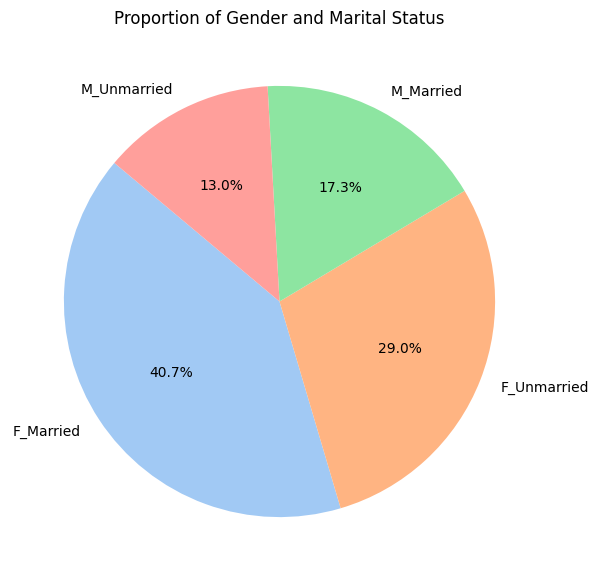

In [23]:
# Add a column combining Gender and Marital Status
df['Gender_Marital'] = df['Gender'] + '_' + df['Marital_Status'].map({0: 'Married', 1: 'Unmarried'})

# Count unique combinations
gender_marital_pie = df['Gender_Marital'].value_counts()

# Pie Chart
plt.figure(figsize=(7, 7))
gender_marital_pie.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel')
)
plt.title('Proportion of Gender and Marital Status')
plt.ylabel('')  # Remove default ylabel
plt.show()


**Question 5: How does the Marital_Status affect the Amount spent?**

In [41]:
df_marital_avg = df.groupby('Marital_Status', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
df_marital_avg

,Marital_Status,Amount
0,0,62125384
1,1,44123745


C:\Users\HP\AppData\Local\Temp\ipykernel_5900\3990327482.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_marital_avg, x='Marital_Status', y='Amount', palette='magma')


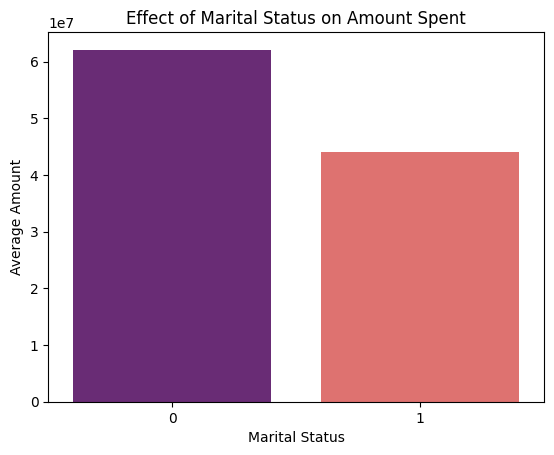

In [42]:
sns.barplot(data=df_marital_avg, x='Marital_Status', y='Amount', palette='magma')
plt.xlabel('Marital Status')
plt.ylabel('Average Amount')
plt.title('Effect of Marital Status on Amount Spent')
plt.show()

**Question 6: How does the total revenue vary by gender and marital status?**

In [67]:
gender_marital_revenue = df.groupby(['Gender', 'Marital_Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
gender_marital_revenue

,Gender,Marital_Status,Amount
0,F,0,43786646
1,F,1,30549207
2,M,0,18338738
3,M,1,13574538


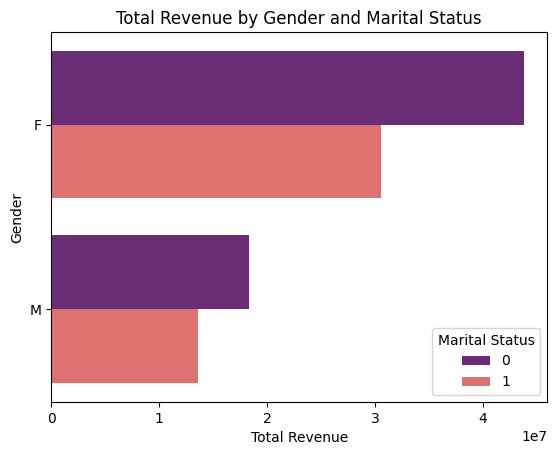

In [66]:
sns.barplot(data=gender_marital_revenue, x='Amount', y='Gender', hue='Marital_Status', palette='magma')
plt.title('Total Revenue by Gender and Marital Status')
plt.xlabel('Total Revenue')
plt.ylabel('Gender')
plt.legend(title='Marital Status')
plt.show()

*Married females contribute the highest to total revenue, while unmarried males contribute least. This suggests that targeted campaigns based on gender and marital status could optimize revenue streams.*

**Question 7 : How does the aggregated spending vary across different age groups?**

In [68]:
pivot_df = df.groupby('Age Group')['Amount'].sum().reset_index()
pivot_df

,Age Group,Amount
0,0-17,2699653
1,18-25,17240732
2,26-35,42613442
3,36-45,22144994
4,46-50,9207844
5,51-55,8261477
6,55+,4080987


C:\Users\HP\AppData\Local\Temp\ipykernel_5900\554617711.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Amount', data=pivot_df, palette='muted')


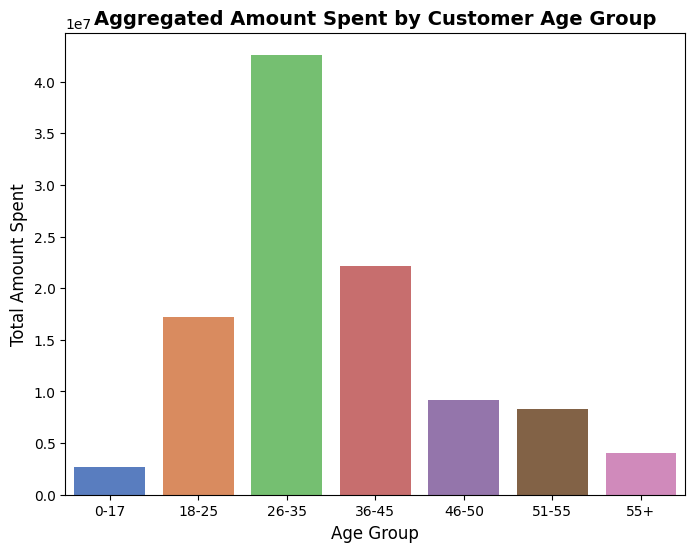

In [69]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age Group', y='Amount', data=pivot_df, palette='muted')
plt.title('Aggregated Amount Spent by Customer Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.show()

*Findings : Poeple having age range 26 - 35 spend highest.*

**Question 8: How does the number of orders vary across different age groups and genders?**

In [51]:
age_gender_orders = df.groupby(['Age Group', 'Gender'], as_index=False)['Orders'].sum()
age_gender_orders

,Age Group,Gender,Orders
0,0-17,F,377
1,0-17,M,313
2,18-25,F,3261
3,18-25,M,1389
4,26-35,F,8217
5,26-35,M,3178
6,36-45,F,3902
7,36-45,M,1785
8,46-50,F,1677
9,46-50,M,694


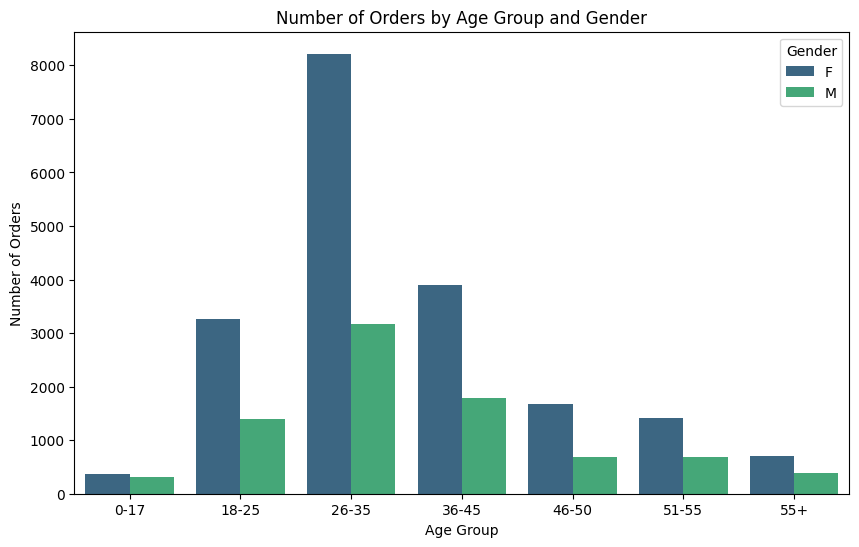

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(data=age_gender_orders, x='Age Group', y='Orders', hue='Gender', palette='viridis')
plt.title('Number of Orders by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.legend(title='Gender')
plt.show()

*Age Group 26-35 orders most frequently in both the genders, while 36-45 age group comes second.*

**Question 9: What is the distribution of spending (Amount) across different age groups?**

In [64]:
age_group_spending = df[['Age Group', 'Amount']]
age_group_spending.describe()

,Amount
count,11239.000000
mean,9453.610553
std,5222.355168
min,188.000000
25%,5443.000000
50%,8109.000000
75%,12675.000000
max,23952.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_5900\2006088865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age Group', y='Amount', palette='coolwarm')


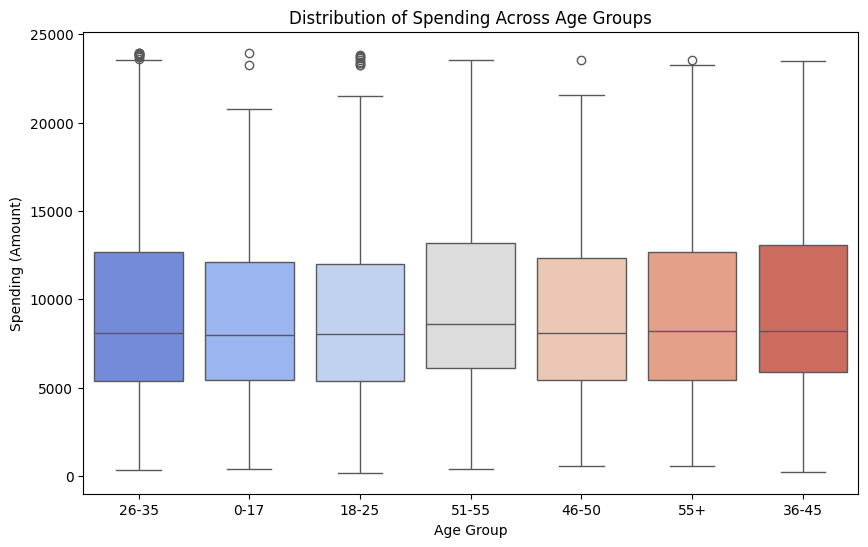

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age Group', y='Amount', palette='coolwarm')
plt.title('Distribution of Spending Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Spending (Amount)')
plt.show()

*The box plot reveals that age group 51-55 has a higher median spending compared to other groups, with a wider spread indicating diverse spending habits. Rest of age groups show narrower distributions, suggesting more consistent spending patterns.*

**Question 10: How does the number of orders vary across different zones?**

In [ ]:
zone_orders = df.groupby('Zone', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
zone_orders

In [ ]:
sns.barplot(data=zone_orders, x='Orders', y='Zone', palette='viridis')
plt.title('Total Orders by Zone')
plt.xlabel('Total Orders')
plt.ylabel('Zone')
plt.show()

**Question 11: Which product categories receive the highest number of orders?**

In [70]:
category_orders = df.groupby('Product_Category', as_index=False)['Orders'].sum()
category_orders['Percentage'] = (category_orders['Orders'] / category_orders['Orders'].sum()) * 100
category_orders = category_orders.sort_values(by='Orders', ascending=False)
category_orders


,Product_Category,Orders,Percentage
3,Clothing & Apparel,6634,23.708945
6,Food,6110,21.836246
5,Electronics & Gadgets,5226,18.676959
7,Footwear & Shoes,2646,9.456417
11,Household items,1331,4.756799
1,Beauty,1086,3.881205
9,Games & Toys,940,3.359422
8,Furniture,889,3.177156
14,Sports Products,870,3.109253
13,Pet Care,536,1.915586


C:\Users\HP\AppData\Local\Temp\ipykernel_5900\784930664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_orders, x='Orders', y='Product_Category', palette='coolwarm')


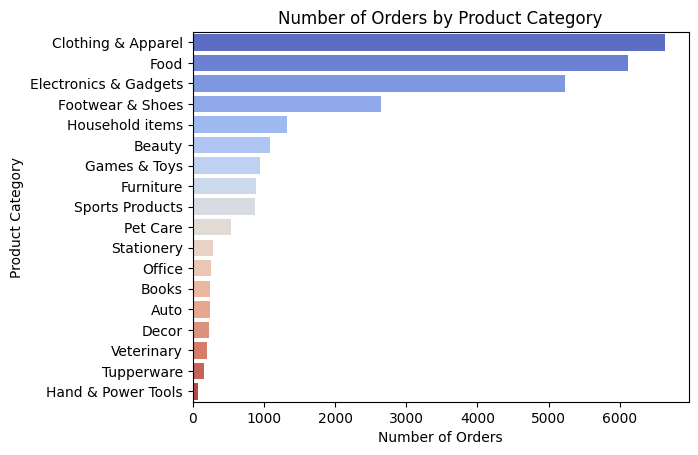

In [71]:
sns.barplot(data=category_orders, x='Orders', y='Product_Category', palette='coolwarm')
plt.title('Number of Orders by Product Category')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show()

*Findings: Clothing and Apparel contributes 24% to the total orders, followed by Food at 22.5%. This indicates that Clothing and Apparel and Food  dominate customer preferences, while categories contributing less than 10% may require targeted promotions.*

**Question 12: What is the total revenue generated by different product categories?**

In [38]:
category_revenue = df.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
category_revenue['Percent_Contribution'] = (category_revenue['Amount'] / category_revenue['Amount'].sum() * 100)
category_revenue


,Product_Category,Amount,Percent_Contribution
6,Food,33933883,31.938034
3,Clothing & Apparel,16495019,15.524851
5,Electronics & Gadgets,15643846,14.723740
7,Footwear & Shoes,15575209,14.659140
8,Furniture,5440051,5.120090
9,Games & Toys,4331694,4.076922
14,Sports Products,3635933,3.422083
1,Beauty,1959484,1.844235
0,Auto,1958609,1.843412
15,Stationery,1676051,1.577473


C:\Users\HP\AppData\Local\Temp\ipykernel_5900\3276022777.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_revenue, x='Amount', y='Product_Category',palette='coolwarm')


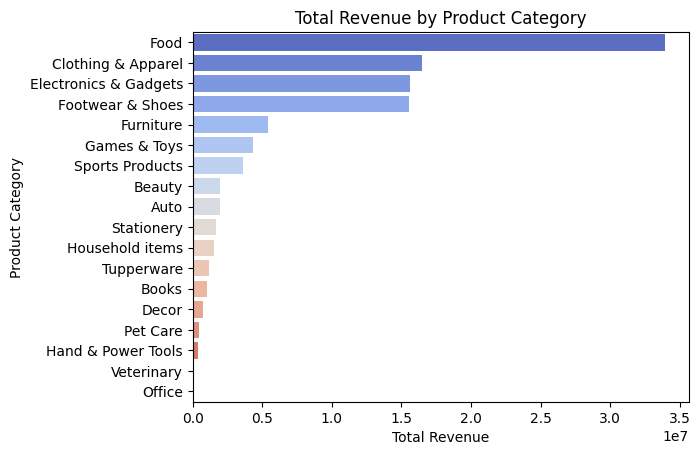

In [58]:
sns.barplot(data=category_revenue, x='Amount', y='Product_Category',palette='coolwarm')
plt.title('Total Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()

*Findings : ALthough Clothing and Apparel recieves the highest number of orders, Food is the highest contributor in Total Revenue, around 32%, followed by food at 16%.*

**Question 13: Is there a correlation between the number of orders and total spending (Amount)?**

In [110]:
correlation_value = df[['Orders', 'Amount']].corr()
correlation_value


,Orders,Amount
Orders,1.000000,-0.013184
Amount,-0.013184,1.000000


**Question 14 : How does spending (Amount) vary across different occupations?**

In [72]:
occupation_spending = df[['Occupation', 'Amount']]
occupation_spending.groupby('Occupation').describe()


Amount                                                    \
                  count         mean          std    min      25%     50%   
Occupation                                                                  
Agriculture       283.0  9162.851590  5138.466845  206.0  5402.00  8073.0   
Automobile        565.0  9501.939823  5277.975829  697.0  5444.00  8281.0   
Aviation         1310.0  9620.074809  5357.899850  381.0  5469.25  8117.5   
Banking          1137.0  9472.832014  5040.277037  567.0  5993.00  8095.0   
Chemical          541.0  9791.933457  5442.793369  370.0  5913.00  8383.0   
Construction      414.0  8689.640097  5189.177058  700.0  5285.75  7772.5   
Food Processing   423.0  9623.333333  5163.212452  773.0  6026.00  8096.0   
Govt              854.0  9973.316159  5358.375524  580.0  5936.75  8638.0   
Healthcare       1408.0  9257.518466  5123.212994  188.0  5406.50  8085.5   
Hospitality       703.0  9070.277383  4894.954024  384.0  5379.00  8082.0   
IT Sector        1583.0  9320.959570  5266.840459  396.0  5322.00  8073.0   
Lawyer            531.0  9381.666667  5205.215180  570.0  5323.50  8135.0   
Media             637.0  9883.566719  5311.443377  557.0  5955.00  8646.0   
Retail            501.0  9547.245509  5320.588282  591.0  5427.00  8081.0   
Textile           349.0  9183.300860  5086.880798  213.0  5401.00  7945.0   

                                    
                      75%      max  
Occupation                          
Agriculture      12352.50  23160.0  
Automobile       12296.00  23924.0  
Aviation         13103.00  23619.0  
Banking          12214.00  23770.0  
Chemical         15218.00  20955.0  
Construction     11918.25  23912.0  
Food Processing  12334.50  23877.0  
Govt             15169.75  23934.0  
Healthcare       12281.25  23952.0  
Hospitality      12034.00  23568.0  
IT Sector        12576.50  23730.0  
Lawyer           12806.50  23841.0  
Media            14063.00  23799.0  
Retail           13481.00  23752.0  
Textile          12090.00  21547.0

C:\Users\HP\AppData\Local\Temp\ipykernel_25360\4162473437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Occupation', y='Amount', palette='Set2')


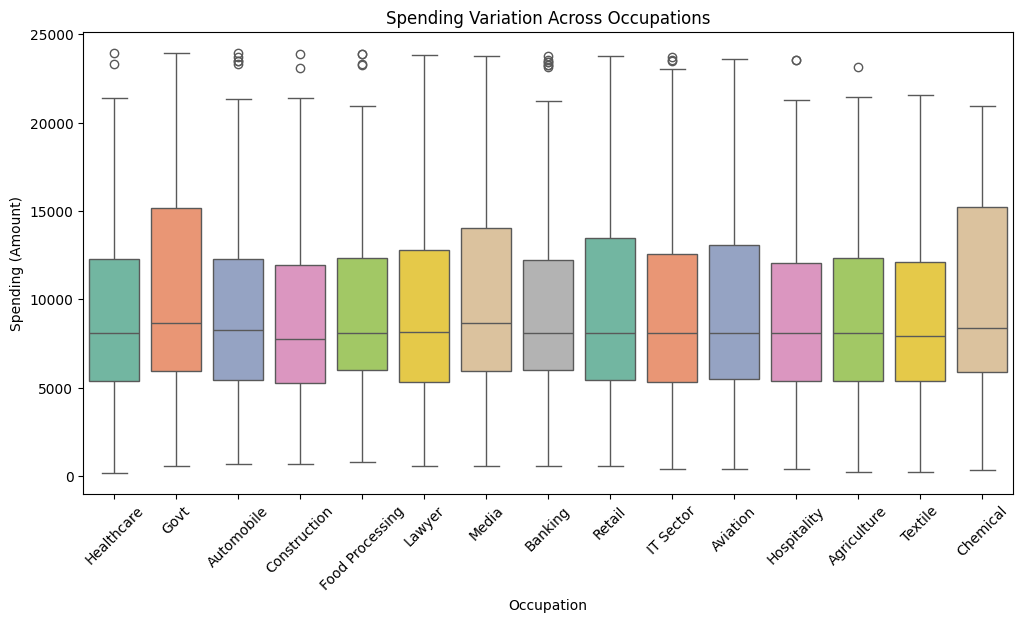

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Occupation', y='Amount', palette='Set2')
plt.title('Spending Variation Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Spending (Amount)')
plt.xticks(rotation=45)
plt.show()


*Findings : Govt Professionals exhibit the highest median spending, with some significant outliers. Other occupations show narrower spending ranges, indicating more consistent purchasing behavior."*

**Question 15: What is the distribution of order quantities?**

In [73]:
order_distribution = df['Orders'].describe()
order_distribution

count    11239.000000
mean         2.489634
std          1.114967
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Orders, dtype: float64

**Question 16 : Is there a relationship between customer age and the total amount spent?**

C:\Users\HP\AppData\Local\Temp\ipykernel_5900\2565279149.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


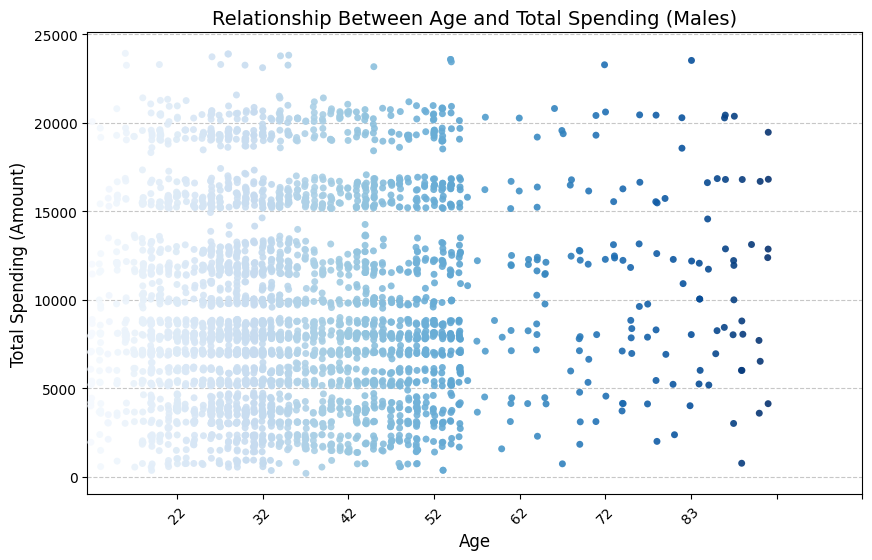

C:\Users\HP\AppData\Local\Temp\ipykernel_5900\2565279149.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


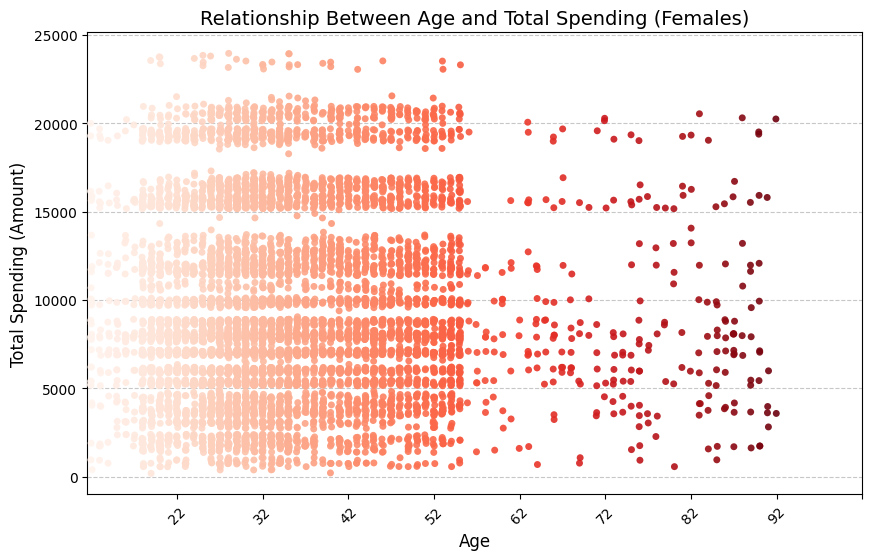

In [76]:
male_data = df[df['Gender'] == 'M']
female_data = df[df['Gender'] == 'F']

# Male Chart with Gradient Palette
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=male_data, 
    x='Age', 
    y='Amount', 
    jitter=True, 
    alpha=0.9, 
    palette='Blues',  # Using Blues palette for males
    size=5
)
plt.title('Relationship Between Age and Total Spending (Males)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Spending (Amount)', fontsize=12)
plt.xticks(ticks=range(10, 100, 10), rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Female Chart with Gradient Palette
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=female_data, 
    x='Age', 
    y='Amount', 
    jitter=True, 
    alpha=0.9, 
    palette='Reds',  # Using Reds palette for females
    size=5
)
plt.title('Relationship Between Age and Total Spending (Females)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Spending (Amount)', fontsize=12)
plt.xticks(ticks=range(10, 100, 10), rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



*Findings: 
Males aged 30–50 exhibit the highest and most varied spending, with a few high-value outliers, making them ideal for premium product targeting. Younger males (under 30) and older males (above 60) spend less, suggesting opportunities for promotional strategies to boost spending in these groups.
Females in the 30–50 age group exhibit the highest and most varied spending, making them an ideal target for premium products. Younger females under 30 and older females above 60 show lower and more consistent spending, suggesting potential for growth through targeted promotions.*

**Question 17: Which occupation contributes the most to total sales?**

In [77]:
occupation_sales = df.groupby('Occupation', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
occupation_sales

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


C:\Users\HP\AppData\Local\Temp\ipykernel_25360\4073786219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=occupation_sales, x='Amount', y='Occupation', palette='Spectral')  # Using 'Spectral' palette


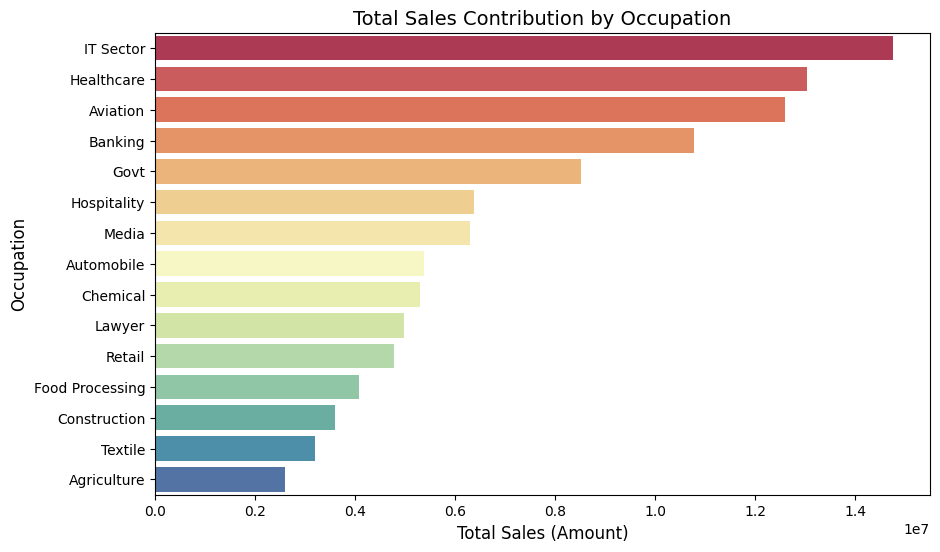

In [164]:
plt.figure(figsize=(10, 6))
sns.barplot(data=occupation_sales, x='Amount', y='Occupation', palette='Spectral')  # Using 'Spectral' palette
plt.title('Total Sales Contribution by Occupation', fontsize=14)
plt.xlabel('Total Sales (Amount)', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.show()

*IT Sector contributes the highest to total sales, making it a key demographic for premium offerings. Sectors like Agriculture, Textile and Construction need tailored marketing campaigns to boost spending.*

**Question 18: What is the total number of orders placed by each occupation?**

In [79]:
occupation_orders = df.groupby('Occupation', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
occupation_orders

C:\Users\HP\AppData\Local\Temp\ipykernel_25360\2572308390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=occupation_orders, x='Orders', y='Occupation', palette='mako')


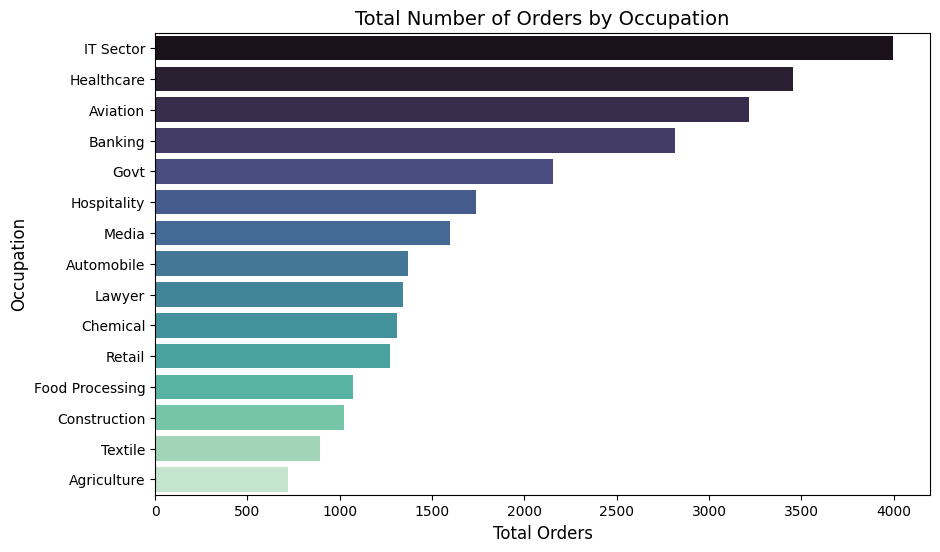

In [254]:
plt.figure(figsize=(10, 6))
sns.barplot(data=occupation_orders, x='Orders', y='Occupation', palette='mako')
plt.title('Total Number of Orders by Occupation', fontsize=14)
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.show()


**Question 19 : What is the average Amount spent by Occupation, broken down by Age Group?**

In [165]:
avg_spent_by_occupation_age = df.groupby(['Occupation', 'Age Group'], as_index=False)['Amount'].mean().sort_values(by='Amount', ascending=False)
avg_spent_by_occupation_age


,Occupation,Age Group,Amount
13,Automobile,55+,12371.312500
97,Retail,55+,11955.000000
55,Govt,55+,11921.625000
34,Chemical,55+,11531.533333
89,Media,51-55,11138.420000
...,...,...,...
39,Construction,46-50,8040.542857
36,Construction,18-25,8016.492537
77,Lawyer,0-17,8015.000000
41,Construction,55+,7113.000000


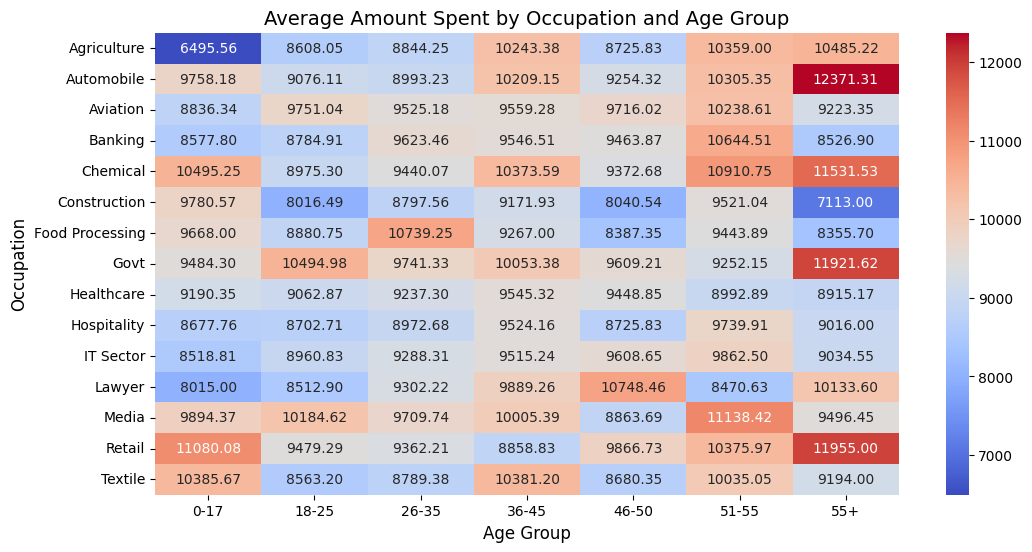

In [168]:
plt.figure(figsize=(12, 6))

# Reshape the data for heatmap
pivot_data = avg_spent_by_occupation_age.pivot(index='Occupation', columns='Age Group', values='Amount')

# Plot the heatmap
sns.heatmap(
    data=pivot_data, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm'
)
plt.title('Average Amount Spent by Occupation and Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.show()


*Retail and Government occupations have the highest average spending across most age groups, making them key targets for premium product campaigns.
The 55+ age group consistently spends the most across all occupations, showing high potential for premium offerings.
The 18–25 age group shows lower average spending across most occupations, indicating a need for promotional strategies to boost engagement.
Chemical and Media occupations show high spending in older age groups, particularly 55+, suggesting an opportunity for targeted marketing.
Construction and Hospitality occupations exhibit the lowest spending on average, making them areas for growth-focused initiatives.*

**Question 20 : What is the average spending (Amount) by Age Group across different Product Categories?**

In [83]:
# Grouping data to calculate the average spending
heatmap_data = df.groupby(['Age Group', 'Product_Category'])['Amount'].mean().reset_index()

# Reshaping the data for heatmap
heatmap_pivot = heatmap_data.pivot(index='Product_Category', columns='Age Group', values='Amount')
heatmap_pivot


Age Group,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category,,,,,,,
Auto,18961.000000,20605.529412,20816.441860,18028.888889,19935.000000,21582.875000,19850.500000
Beauty,4569.888889,4472.558442,4709.640244,4440.951220,5039.787879,5139.405405,4047.900000
Books,10249.000000,10083.350000,10351.024390,9577.136364,10706.444444,11631.571429,12231.333333
Clothing & Apparel,6069.597222,6316.496802,6214.495743,6116.654135,6197.350427,6364.670213,6078.165049
Decor,7956.000000,7055.368421,8120.363636,7092.869565,7576.500000,8615.600000,7680.200000
Electronics & Gadgets,7486.327869,7482.373178,7484.854567,7610.552058,7408.263441,7441.141243,7402.000000
Food,13011.915663,13763.198745,13754.614531,13739.517621,12801.788732,13781.744048,13246.669903
Footwear & Shoes,13151.166667,14384.933333,14563.393868,14923.550820,14607.775000,15219.361111,14231.254902
Furniture,15028.692308,15406.455882,15493.683824,15337.318841,15305.827586,15083.461538,17780.363636


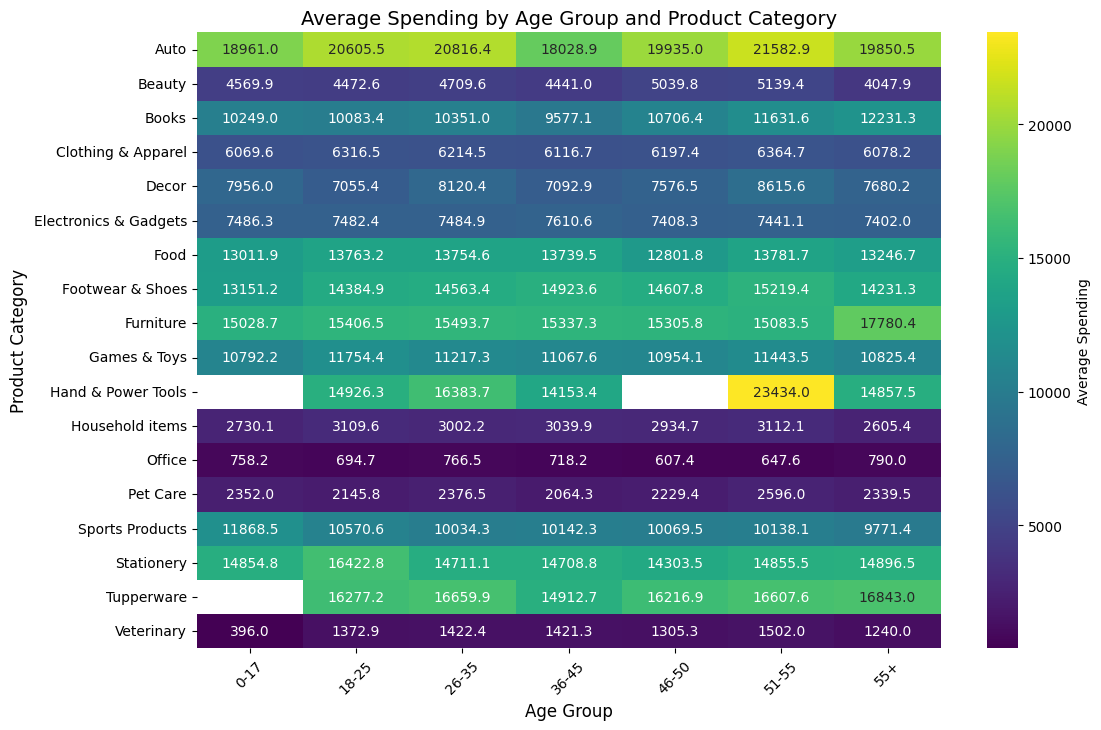

In [84]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".1f", cmap='viridis', cbar_kws={'label': 'Average Spending'})
plt.title('Average Spending by Age Group and Product Category', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Section 4: Key Insights

- **Customer Demographics**:  
   70% of customers are female, with married females accounting for 41% of the total.  
   60% of customers are married, emphasizing their significance as a target audience.  
   Married males (17%) and unmarried males (13%) form smaller but valuable segments for tailored campaigns.  

- **Spending Patterns**:  
   The 51–55 age group exhibits the highest median spending and diverse habits, showing strong potential for premium offerings.  
   Customers aged 30–50, both male and female, demonstrate the highest and most varied spending patterns, making them key targets.  
   Younger customers (under 30) and older customers (above 60) spend less but offer growth potential through targeted promotions.  

- **Product Performance**:  
   Clothing and Apparel (24%) and Food (22.5%) dominate in order volumes, reflecting customer preferences.  
   Food contributes the most to total revenue (32%), followed by Clothing and Apparel (16%), signaling areas for revenue optimization.  

- **Occupation Trends**:  
   The IT sector contributes the most to total sales.  
   Retail and Government occupations have the highest average spending across age groups.  
   The 55+ age group spends the most across all occupations, highlighting their value for premium products.  
   Agriculture, Construction, and Hospitality occupations show lower spending, presenting growth opportunities.  


### Section 5: Recommendations

- **Customer Segmentation**:  
Prioritize marketing efforts on married females and males aged 30–50 to maximize revenue.  
Introduce loyalty programs and personalized offers for high-value segments like the 51–55 age group.  

- **Product Strategies**:  
Expand offerings in Food and Clothing and Apparel, given their dominance in revenue and orders.  
Boost underperforming categories like Beauty and Furniture through promotions, bundling, or discounts.  

- **Occupation-Focused Campaigns**:  
Design campaigns targeting IT, Retail, and Government sectors to drive premium product sales.  
Tailor marketing efforts to engage Agriculture, Construction, and Hospitality sectors and increase their spending.  

- **Age-Specific Promotions**:  
Create promotions to engage younger customers (under 30) and increase their spending.  
Offer premium products and personalized incentives for the 55+ age group, leveraging their high spending potential.  


**End of Project - Thank You!**